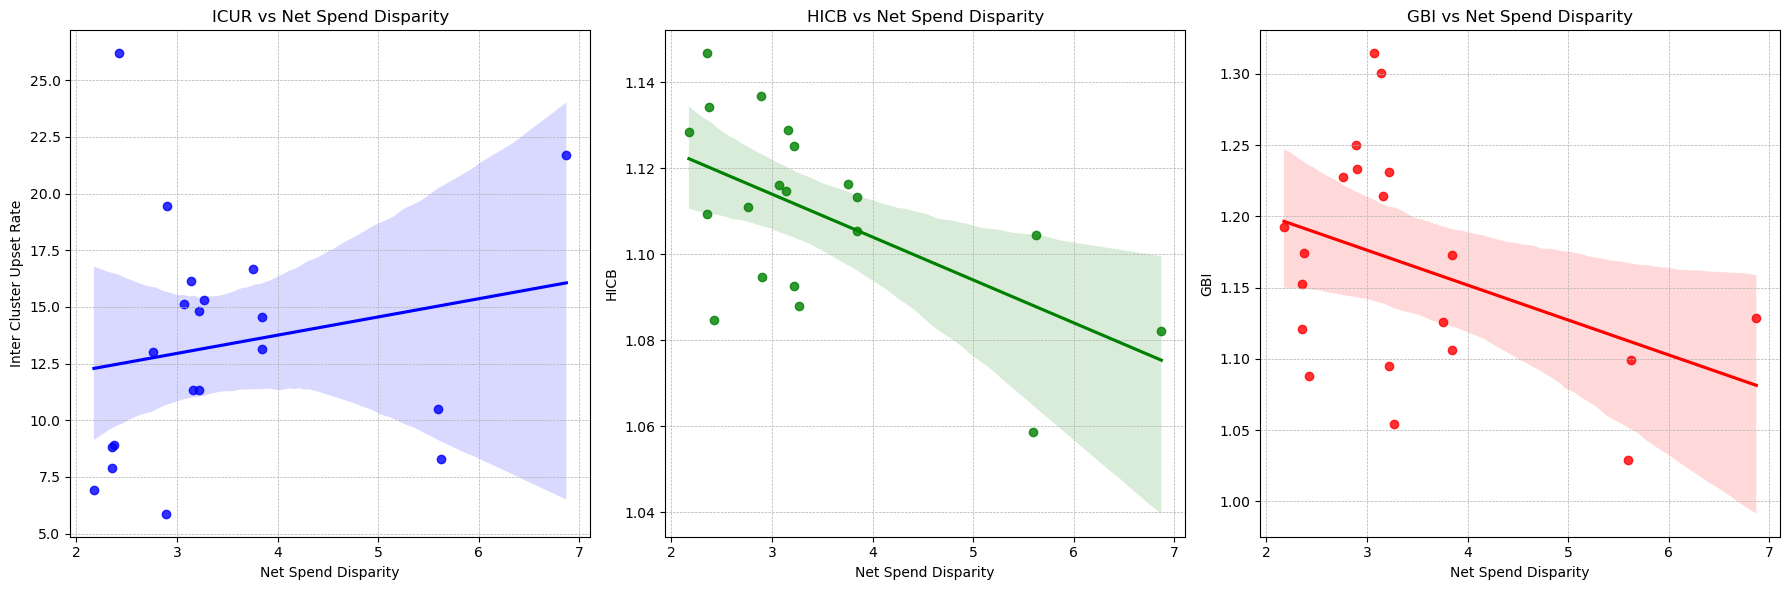

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
data = pd.read_excel("FinalAnalysis.xlsx")
data.head()


# Calculate the Pearson correlation coefficient between ICUR and Net Spend Disparity
correlation = data["Inter Cluster Upset Rate"].corr(data["Net Spend Disparity"])

correlation


# Calculate the Pearson correlation coefficient between Net Spend Disparity and HICB & GBI
correlation_hicb = data["Net Spend Disparity"].corr(data["HICB"])
correlation_gbi = data["Net Spend Disparity"].corr(data["GBI"])

correlation_hicb, correlation_gbi





import seaborn as sns

# Setting up the plot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting Scatter plot with regression line for ICUR vs Net Spend Disparity
sns.regplot(x='Net Spend Disparity', y='Inter Cluster Upset Rate', data=data, ax=axes[0], color='blue')
axes[0].set_title('ICUR vs Net Spend Disparity')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting Scatter plot with regression line for HICB vs Net Spend Disparity
sns.regplot(x='Net Spend Disparity', y='HICB', data=data, ax=axes[1], color='green')
axes[1].set_title('HICB vs Net Spend Disparity')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting Scatter plot with regression line for GBI vs Net Spend Disparity
sns.regplot(x='Net Spend Disparity', y='GBI', data=data, ax=axes[2], color='red')
axes[2].set_title('GBI vs Net Spend Disparity')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting layout
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np

# Load the dataset from the Excel file
df = pd.read_excel("/mnt/data/Club Expenditure.xlsx")

# Function to convert expenditure values to numeric format
def convert_expenditure_updated(value):
    if 'm' in value:
        return float(value.replace('€', '').replace('m', '')) * 1e6  # Convert to actual value
    elif 'k' in value:
        return float(value.replace('€', '').replace('k', '')) * 1e3  # Convert to actual value
    elif value == '-':
        return np.nan  # Handle missing or unavailable data
    else:
        return float(value.replace('€', ''))

# Apply the updated conversion function to the Expenditure column
df['Expenditure'] = df['Expenditure'].apply(convert_expenditure_updated)


# Re-compute the disparity ratio for each season based on top 10 and bottom 10 teams
disparity_ratios_10 = {}

for season in df['Season'].unique():
    season_data = df[df['Season'] == season]
    
    # Calculate average expenditure for top 10 teams
    avg_expenditure_top_10 = season_data[season_data['Position'] <= 10]['Expenditure'].mean()
    
    # Calculate average expenditure for bottom 10 teams
    avg_expenditure_bottom_10 = season_data[season_data['Position'] > 10]['Expenditure'].mean()
    
    # To avoid division by zero in case the average expenditure for bottom teams is zero
    if avg_expenditure_bottom_10 == 0:
        disparity_ratio_10 = np.nan
    else:
        disparity_ratio_10 = avg_expenditure_top_10 / avg_expenditure_bottom_10
    
    # Store the disparity ratio in the dictionary
    disparity_ratios_10[season] = disparity_ratio_10

# Convert the dictionary to a pandas DataFrame for better visualization
disparity_df_10 = pd.DataFrame(list(disparity_ratios_10.items()), columns=['Season', 'Disparity Ratio (Top 10 vs Bottom 10)'])

disparity_df_10


NameError: name 'df' is not defined